# 4. SQL Joins

### 4. 1 Theory 

The concept of joining tables in an RDBMS is fundamental to everyday use. There are many different way to join tables together. The most intuitive to us is the **INNER join** where we merge tables together such that the resulting table contains fields from both based a single field which they have in common. This is very useful when we have related data is stored across multiple tables. The other types of joins are **OUTER (LEFT, RIGHT AND FULL)**, **SELF** and **CROSS**. A general description of each is as follows,

| Join Type        | Description                                                                 | Typical Use Case                                                                 |
|------------------|-----------------------------------------------------------------------------|----------------------------------------------------------------------------------|
| **INNER JOIN**   | Returns rows where there is a match in **both** tables.                    | When you only want records that exist in both tables (e.g., customers who made purchases). |
| **LEFT JOIN**    | Returns all rows from the **left** table, plus matched rows from the right. Missing matches are filled with `NULL`. | When you want all records from the left table regardless of whether there is a match (e.g., all customers and their purchases, including those who bought nothing). |
| **RIGHT JOIN**   | Returns all rows from the **right** table, plus matched rows from the left. Missing matches are filled with `NULL`. | Similar to LEFT JOIN but ensures all rows from the right table are kept (e.g., all purchases and the customers who made them, even if some customers’ info is missing). |
| **FULL OUTER JOIN** | Returns all rows from **both** tables, matching where possible, filling with `NULL` otherwise. | When you want a complete set of records from both tables, matched or not (e.g., all customers and all purchases, even if some don’t line up). |
| **SELF JOIN**    | Joins a table with itself, usually with an alias.                          | Useful for hierarchical or recursive relationships (e.g., employees and their managers stored in the same table). |
| **CROSS JOIN**   | Returns the Cartesian product: every row in the first table combined with every row in the second. | When you need all possible combinations (e.g., pairing every product with every store for analysis). |

When a join is performed, it is done **ON** a column or columns that at least one of the tables possess. The **join-predicate** determines the nature of the join.

In [1]:
# Using prettytable to display tables,
import prettytable

# Creating connection,
%load_ext sql
%sql sqlite:///database.db

### 4.2 INNER Joins

An **INNER** join is the most common type of join and simply called **JOIN** in SQL. We can imagine that that a given row of the first table is compared to all rows of the second table. When a pair of rows satifies the join-predicate, they are combined in a specified way and added to the returned table. We can imagine that this is repeated for all rows of the first table. A very common case is when the first table has a primary key and the second has a foreign key. In this scenario, the join-predicate is simply the condition that both keys are matching in their values. Considering the example below,

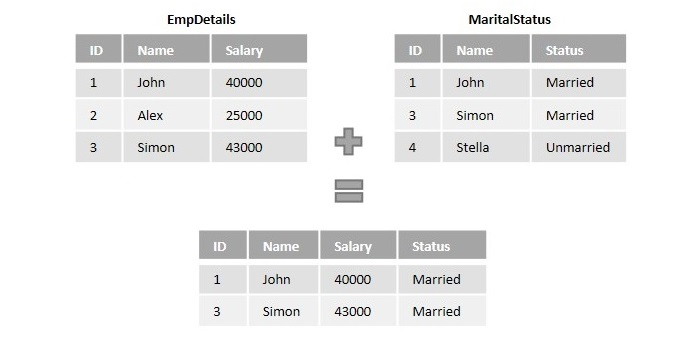



When performing an inner join between `EmpDetails` and `MaritialStatus` on the `ID` field, `EmpDetails.ID` is compared to `MaritialStatus.ID` and we can imagine the comparisions `(1, 1)`, `(1, 3)`, `(1, 4)`, `(2, 1)`, ... etc. Only when `EmpDetails.ID = MaritialStatus.ID` are the rows from both tables combined and added to the returned table. Now let us consider a different example, say that our customers are able to purchase different perfumes. We first create the table,

In [12]:
%%sql

CREATE TABLE purchases (
    TRANS_ID INT NOT NULL,
    CUSTOMER_ID INT NOT NULL,
    ProductName VARCHAR(32) NOT NULL,
    Brand VARCHAR(32),
    Quantity INT NOT NULL
);

 * sqlite:///database.db
Done.


[]

Now we add the transaction data for a given day,

In [15]:
%%sql

INSERT INTO purchases (TRANS_ID, CUSTOMER_ID, ProductName, Brand, Quantity) VALUES
(4001, 1,  'Sauvage',               'Dior',              1),
(4002, 1,  'Acqua di Giò',          'Armani',            2),
(4003, 2,  'No.5',                  'Chanel',            1),
(4004, 2,  'Coco Mademoiselle',     'Chanel',            1),
(4005, 3,  'Bloom',                 'Gucci',             1),
(4006, 3,  'Guilty',                'Gucci',             1),
(4007, 4,  'Luna Rossa',            'Prada',             1),
(4008, 5,  'Eros',                  'Versace',           2),
(4009, 6,  'Libre',                 'Yves Saint Laurent','1'),
(4010, 6,  'Black Opium',           'Yves Saint Laurent','1'),
(4011, 7,  'Black Orchid',          'Tom Ford',          1),
(4012, 8,  'Light Blue',            'Dolce & Gabbana',   2),
(4013, 9,  'Eternity',              'Calvin Klein',      1),
(4014, 10, 'Boss Bottled',          'Hugo Boss',         1),
(4015, 11, 'L’Interdit',            'Givenchy',          1),
(4016, 12, 'Peony & Blush Suede',   'Jo Malone',         1),
(4017, 13, 'Terre d’Hermès',        'Hermès',            1),
(4018, 14, 'Omnia Crystalline',     'Bvlgari',           1),
(4019, 15, 'Explorer',              'Montblanc',         1),
(4020, 16, 'Aventus',               'Creed',             1),
(4021, 17, 'Voce Viva',             'Valentino',         1),
(4022, 18, 'Coach for Men',         'Coach',             1),
(4023, 19, 'Angel',                 'Mugler',            1),
(4024, 20, 'La Vie Est Belle',      'Lancôme',           2),
(4025, 21, 'Déclaration',           'Cartier',           1),
(4026, 22, 'L’Eau d’Issey',         'Issey Miyake',      1),
(4027, 23, '1 Million',             'Paco Rabanne',      1),
(4028, 23, 'Invictus',              'Paco Rabanne',      1),
(4029, 24, 'Le Male',               'Jean Paul Gaultier',1),
(4030, 25, 'Femme',                 'Zara',              1),
(4031, 26, 'Bombshell',             'Victoria’s Secret', 1),
(4032, 27, 'Good Girl',             'Carolina Herrera',  1),
(4033, 28, 'Idôle',                 'Lancôme',           1);

SELECT * FROM purchases;

 * sqlite:///database.db
33 rows affected.
Done.


TRANS_ID,CUSTOMER_ID,ProductName,Brand,Quantity
4001,1,Sauvage,Dior,1
4002,1,Acqua di Giò,Armani,2
4003,2,No.5,Chanel,1
4004,2,Coco Mademoiselle,Chanel,1
4005,3,Bloom,Gucci,1
4006,3,Guilty,Gucci,1
4007,4,Luna Rossa,Prada,1
4008,5,Eros,Versace,2
4009,6,Libre,Yves Saint Laurent,1
4010,6,Black Opium,Yves Saint Laurent,1


Now let us say that we want to know which customers made the orders, we would want to join the two tables on the `ID` field. Since we do not require the `Age`, `Sex` and `Package` fields, we specifiy which columns of `customer_data` we want `purchases` to be joined on to. The syntax for this type of join is,

`SELECT column1, column2, ..., columnN FROM table1 JOIN table2 ON table1.field_1 = table2.field_2`

Note that `column1, column2, ..., columnN` refers to columns that can be found in either `table1` or `table2`. Applying this to our case,

In [24]:
%%sql

SELECT TRANS_ID, FirstName, LastName, ProductName, Brand, Quantity FROM customer_data JOIN purchases ON customer_data.ID = purchases.CUSTOMER_ID;

 * sqlite:///database.db
Done.


TRANS_ID,FirstName,LastName,ProductName,Brand,Quantity
4001,Alice,Smith,Sauvage,Dior,1
4002,Alice,Smith,Acqua di Giò,Armani,2
4003,Bob,Johnson,No.5,Chanel,1
4004,Bob,Johnson,Coco Mademoiselle,Chanel,1
4005,Carol,Williams,Bloom,Gucci,1
4006,Carol,Williams,Guilty,Gucci,1
4007,David,Brown,Luna Rossa,Prada,1
4008,Evie,Davis,Eros,Versace,2
4009,Frank,Miller,Libre,Yves Saint Laurent,1
4010,Frank,Miller,Black Opium,Yves Saint Laurent,1


Our syntax can also include **WHERE** which can be used to apply additional conditions,

`SELECT column1, column2, ..., columnN FROM table1 JOIN table2 ON table1.field_1 = table2.field_2 WHERE {conditions}`

Back to our example, we only want to consider transcations which involve perfumes made by Gucci,

In [2]:
%%sql

SELECT TRANS_ID, FirstName, LastName, ProductName, Brand, Quantity FROM customer_data JOIN purchases ON customer_data.ID = purchases.CUSTOMER_ID WHERE "Brand"='Gucci';

 * sqlite:///database.db
Done.


TRANS_ID,FirstName,LastName,ProductName,Brand,Quantity
4005,Carol,Williams,Bloom,Gucci,1
4006,Carol,Williams,Guilty,Gucci,1


### 4.3 Outer Joins



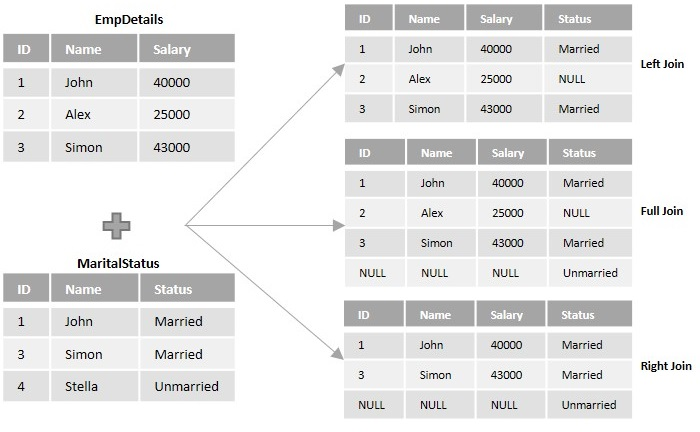